In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Load the dataset
data = pd.read_csv('data_normalization.xls')

data.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.105263,0,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.052632,0,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.263158,0,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.157895,0,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.210526,1,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Identify the Target Variable
Target_column = "loan_status"
Y = data[Target_column]
X = data.drop(columns=[Target_column])

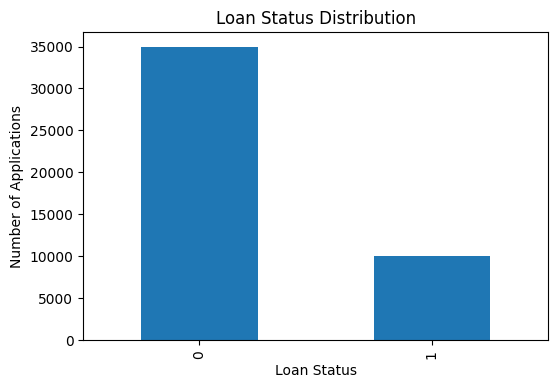

In [6]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
x_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

counts = data[Target_column].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applications")
plt.show()

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [8]:
fs = SelectKBest(score_func = mutual_info_classif, k=10)
fs.fit(X,Y)

,score_func,<function mut...00202B84D4040>
,k,10


In [9]:
fs.scores_

array([0.00000000e+00, 2.26982122e-03, 8.66477138e-02, 5.79443799e-03,
       1.67635311e-02, 6.96380569e-02, 7.94398617e-02, 2.54492946e-04,
       0.00000000e+00, 1.97672107e-01, 4.64366782e-04, 5.20864588e-03,
       0.00000000e+00, 0.00000000e+00, 1.73418962e-04, 2.81030882e-02,
       0.00000000e+00, 1.06158564e-02, 3.59554251e-02, 4.75135497e-04,
       3.39148774e-03, 3.93387598e-04, 3.22217155e-03, 1.19847104e-03,
       6.08676813e-03])

In [10]:
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score

person_age                        0.000000
person_gender                     0.002270
person_income                     0.086648
person_emp_exp                    0.005794
loan_amnt                         0.016764
loan_int_rate                     0.069638
loan_percent_income               0.079440
cb_person_cred_hist_length        0.000254
credit_score                      0.000000
previous_loan_defaults_on_file    0.197672
person_education_Associate        0.000464
person_education_Bachelor         0.005209
person_education_Doctorate        0.000000
person_education_High School      0.000000
person_education_Master           0.000173
person_home_ownership_MORTGAGE    0.028103
person_home_ownership_OTHER       0.000000
person_home_ownership_OWN         0.010616
person_home_ownership_RENT        0.035955
loan_intent_DEBTCONSOLIDATION     0.000475
loan_intent_EDUCATION             0.003391
loan_intent_HOMEIMPROVEMENT       0.000393
loan_intent_MEDICAL               0.003222
loan_intent

<Axes: >

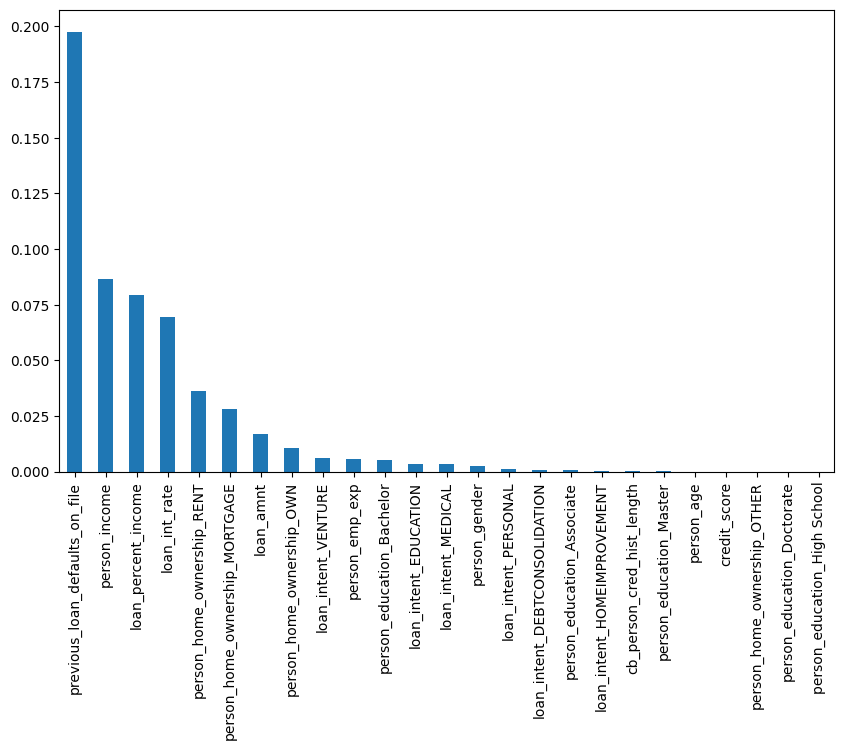

In [13]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(10, 6))

In [15]:
X_selected = fs.fit_transform(X, Y)

In [16]:
selected_feature_indices = fs.get_support(indices=True)
selected_feature_names = x_encoded.columns[selected_feature_indices]

# Step 4: Create a new DataFrame with the selected data and column names
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)

X_selected_df

,person_gender,person_income,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION
0,0.0,0.398015,1.000000,0.748059,1.000000,0.0,0.0,0.0,1.0,0.0
1,0.0,0.026651,0.022131,0.403670,0.216216,1.0,0.0,1.0,0.0,1.0
2,0.0,0.027622,0.221306,0.525759,1.000000,0.0,1.0,0.0,0.0,0.0
3,0.0,0.446594,1.000000,0.692308,1.000000,0.0,0.0,0.0,1.0,0.0
4,1.0,0.361835,1.000000,0.624559,1.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
44995,1.0,0.248781,0.641788,0.722653,0.837838,0.0,0.0,0.0,1.0,0.0
44996,0.0,0.359750,0.376221,0.610445,0.378378,0.0,0.0,0.0,1.0,0.0
44997,1.0,0.304617,0.100517,0.324629,0.135135,0.0,0.0,0.0,1.0,0.0
44998,1.0,0.156622,0.509004,0.551164,0.972973,0.0,0.0,0.0,1.0,1.0


In [18]:
# Add target variable to create final dataset
final_data = X_selected_df.copy()
final_data[Target_column]=Y.values

In [19]:
final_data.to_csv('final_preprocessed_data.csv', index=False)
print("Saved: final_preprocessed_data.csv")

Saved: final_preprocessed_data.csv
